# --- Import Libraries ---

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. LOAD & INSPECT DATA ---

In [3]:
df = pd.read_csv('train.csv')

print("--- DATA INFO (Missing Values & Types) ---")
print(df.info())

print("\n--- STATISTICAL SUMMARY ---")
print(df.describe())

# Handling Missing Values (Essential for Visuals)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\n--- VALUE COUNTS (Categorical Data) ---")
print("Survived:\n", df['Survived'].value_counts())
print("Pclass:\n", df['Pclass'].value_counts())
print("Sex:\n", df['Sex'].value_counts())

--- DATA INFO (Missing Values & Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- STATISTICAL SUMMARY ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383

# --- 2. UNIVARIATE ANALYSIS (Histograms) ---

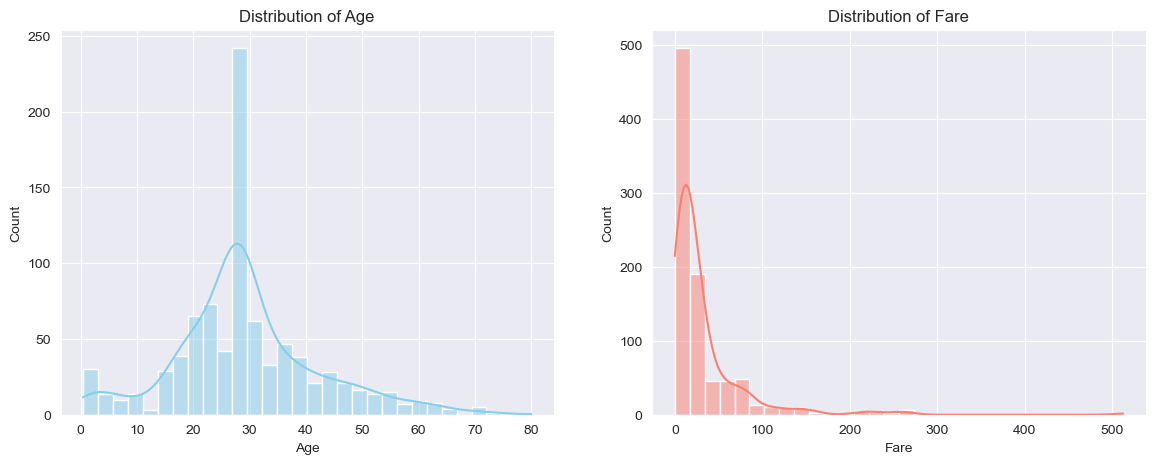

In [4]:

# Req: Plot histograms
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], kde=True, color='salmon', bins=30)
plt.title('Distribution of Fare')
plt.show()

# --- 3. BIVARIATE ANALYSIS (Boxplots & Scatterplots) ---

C:\Users\Sriram\AppData\Local\Temp\ipykernel_5724\517140831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')


Text(0.5, 1.0, 'Age Distribution by Passenger Class')

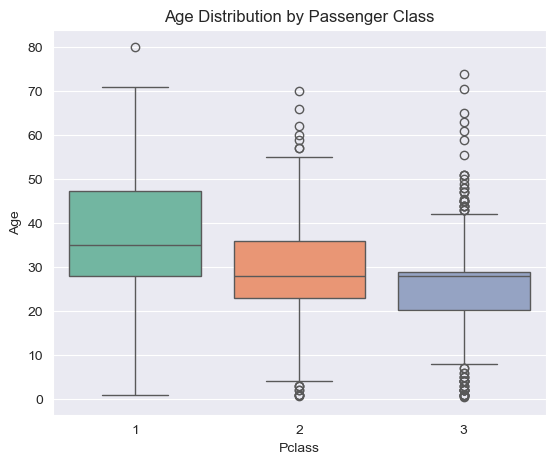

In [5]:
# Req: Plot , scatterplots
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Passenger Class')

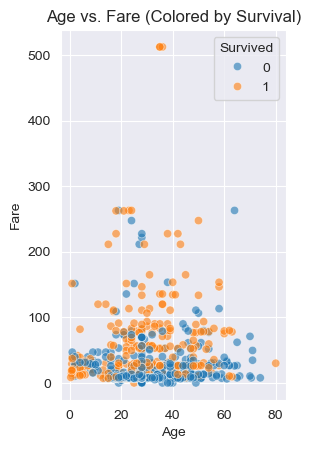

In [6]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.6)
plt.title('Age vs. Fare (Colored by Survival)')
plt.show()

# --- 4. MULTIVARIATE ANALYSIS (Pairplot & Heatmap) ---

## Pairplot

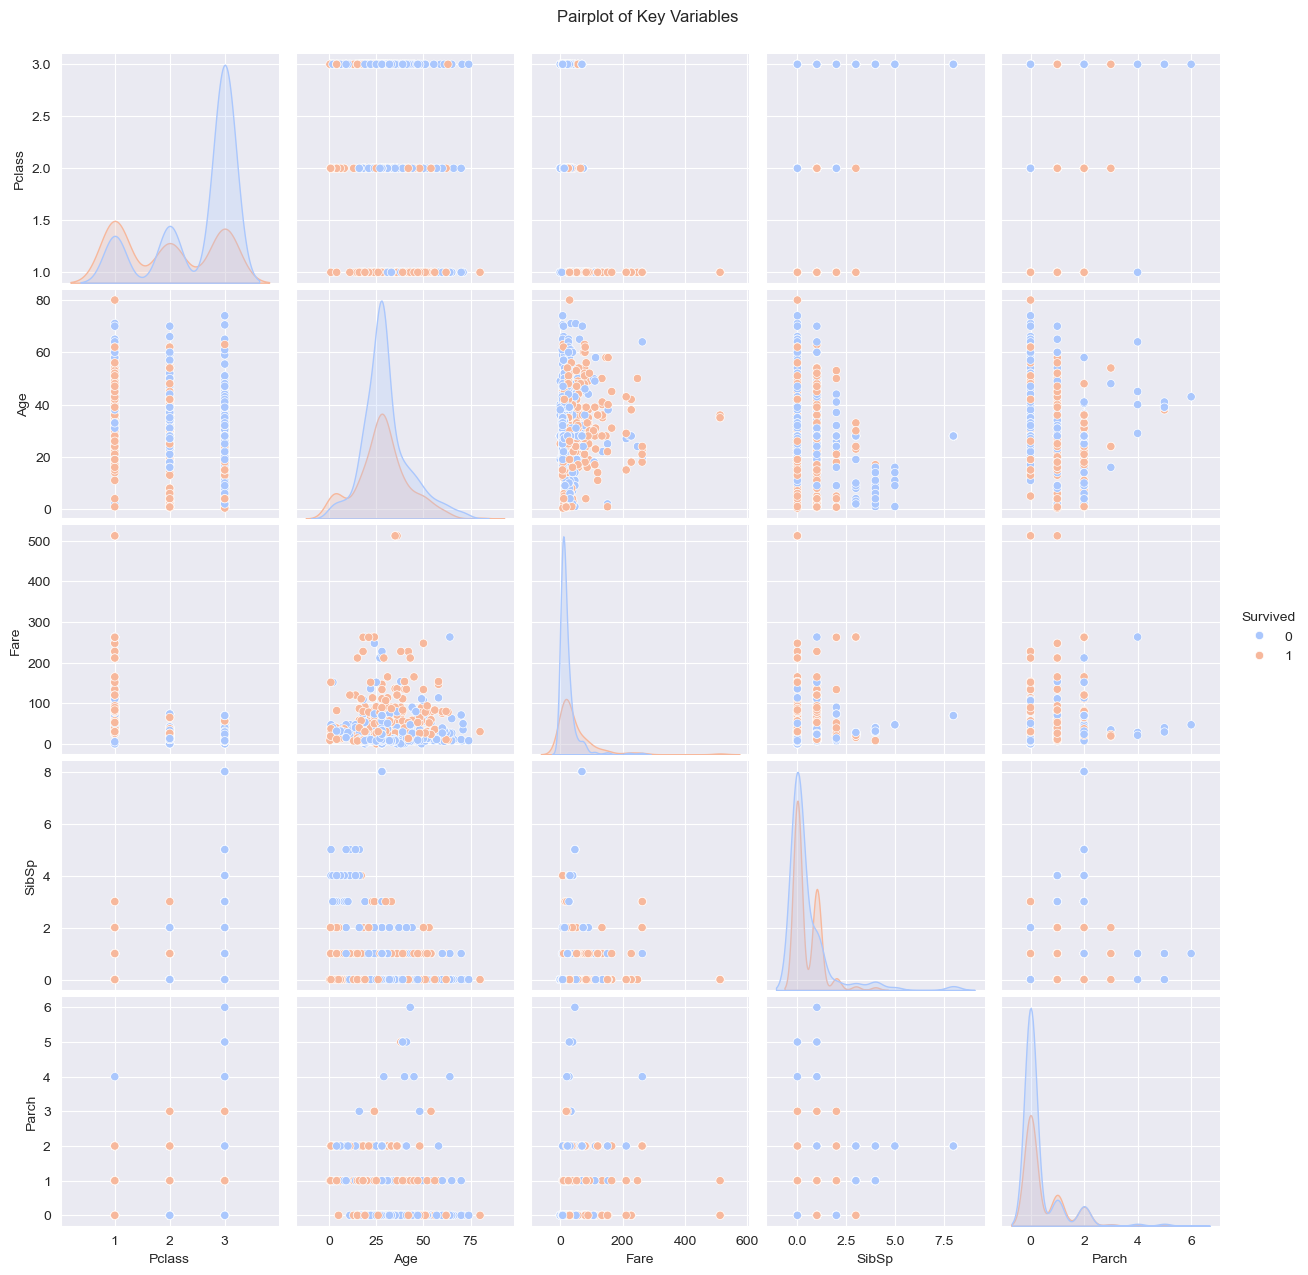

In [7]:
# We select specific columns to keep the plot readable
subset_cols = ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']
sns.pairplot(df[subset_cols], hue='Survived', palette='coolwarm')
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

## Heatmap

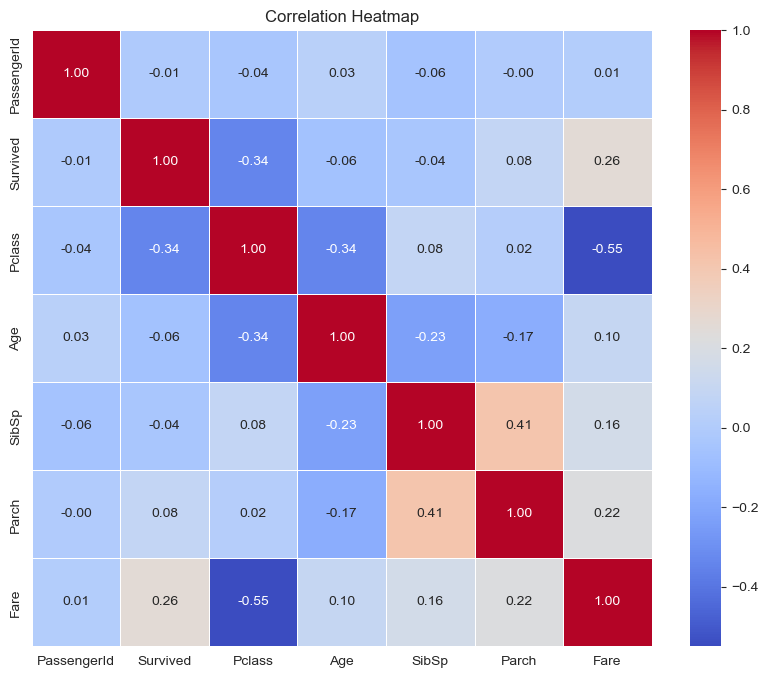

In [8]:
plt.figure(figsize=(10, 8))
# Calculate correlation only on numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()